In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/EmmaChamberlain/Emma Chamberlain_videos.csv')

In [4]:
# Reemplazar 'Subtitle not available' por valores nulos en la columna 'transcript'
df['transcript'] = df['transcript'].replace('Subtitle not available', pd.NA)

In [5]:
# Check for missing values
print(df.isnull().sum())

video_id        0
title           0
description     1
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [6]:
# Check for duplicates
print(df.duplicated().sum())

0


In [7]:
# Convert 'publish_date' to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [8]:
# Extract features from 'publish_date'
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
df['day_of_week'] = df['publish_date'].dt.dayofweek
df['hour'] = df['publish_date'].dt.hour

In [9]:
df['likes'] = pd.to_numeric(df['likes'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')
df['views'] = pd.to_numeric(df['views'], errors='coerce')

df['likes'] = df['likes'].fillna(0)
df['comments'] = df['comments'].fillna(0)
df['views'] = df['views'].fillna(1)


# Create 'engagement rate'
df['engagement_rate'] = (df['likes'] + df['comments']) / df['views']


In [10]:
# Descriptive statistics
print(df.describe())

              likes         views      comments         year       month  \
count  2.820000e+02  2.820000e+02    282.000000   282.000000  282.000000   
mean   2.346354e+05  5.593459e+06  10249.992908  2018.695035    7.187943   
std    1.517226e+05  4.230503e+06   9602.106079     1.571287    3.240666   
min    1.894200e+04  5.447670e+05      0.000000  2017.000000    1.000000   
25%    1.073982e+05  2.991707e+06   3935.750000  2017.000000    5.000000   
50%    2.371690e+05  4.913082e+06   7713.500000  2018.000000    7.500000   
75%    3.203258e+05  7.002393e+06  13336.250000  2020.000000   10.000000   
max    1.042064e+06  3.772295e+07  69228.000000  2023.000000   12.000000   

       day_of_week        hour  engagement_rate  
count   282.000000  282.000000       282.000000  
mean      3.787234   15.964539         0.044915  
std       2.229880    6.750154         0.012884  
min       0.000000    0.000000         0.016232  
25%       2.000000   15.000000         0.034877  
50%       4.000

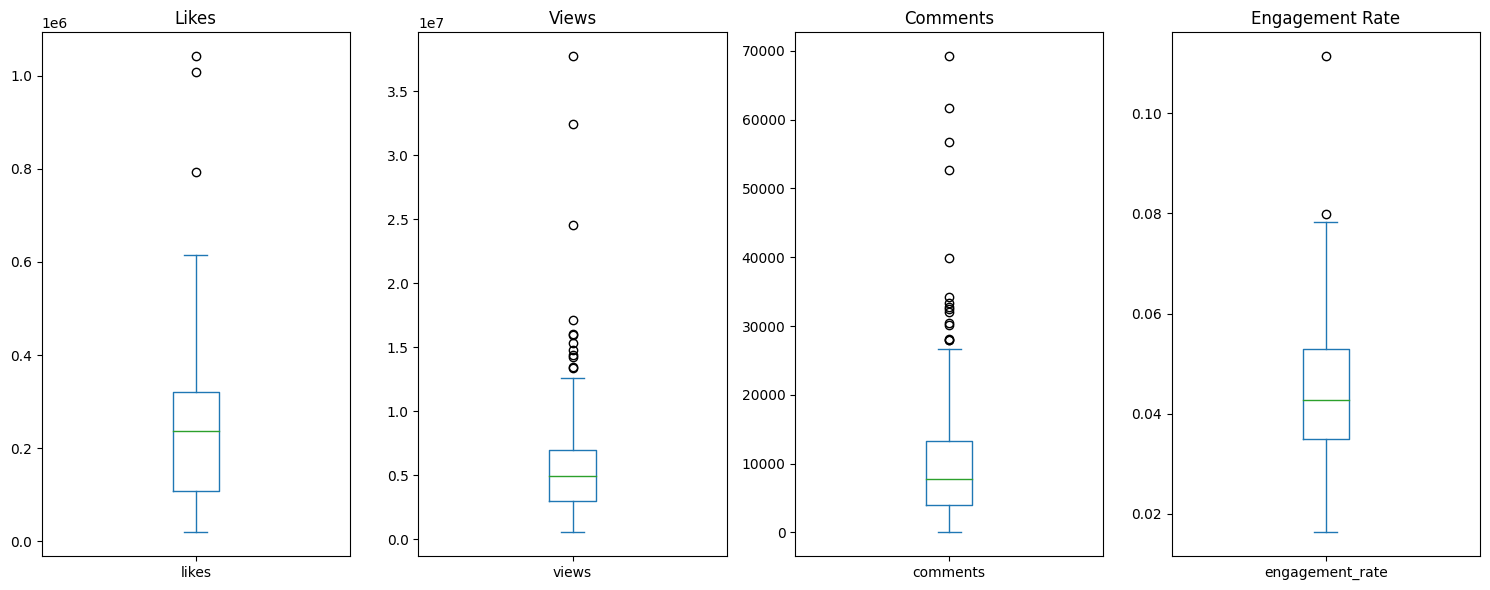

In [11]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 6))

# Create box plots for each column and place them in the subplots
df['likes'].plot(kind='box', ax=axes[0])
df['views'].plot(kind='box', ax=axes[1])
df['comments'].plot(kind='box', ax=axes[2])
df['engagement_rate'].plot(kind='box', ax=axes[3])

# Set titles for subplots
axes[0].set_title('Likes')
axes[1].set_title('Views')
axes[2].set_title('Comments')
axes[3].set_title('Engagement Rate')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

array([[<AxesSubplot: title={'center': 'likes'}>,
        <AxesSubplot: title={'center': 'views'}>],
       [<AxesSubplot: title={'center': 'comments'}>,
        <AxesSubplot: title={'center': 'engagement_rate'}>]], dtype=object)

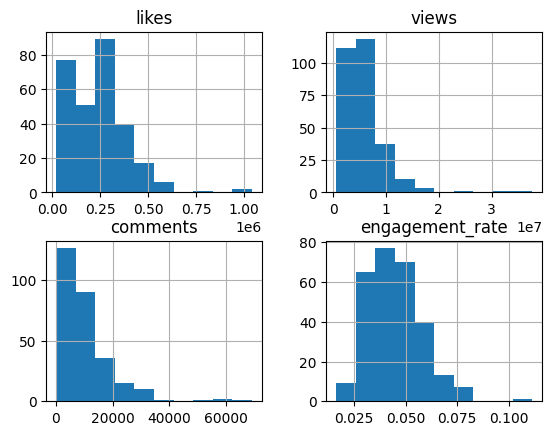

In [12]:
# Histograms
df[['likes', 'views', 'comments', 'engagement_rate']].hist()

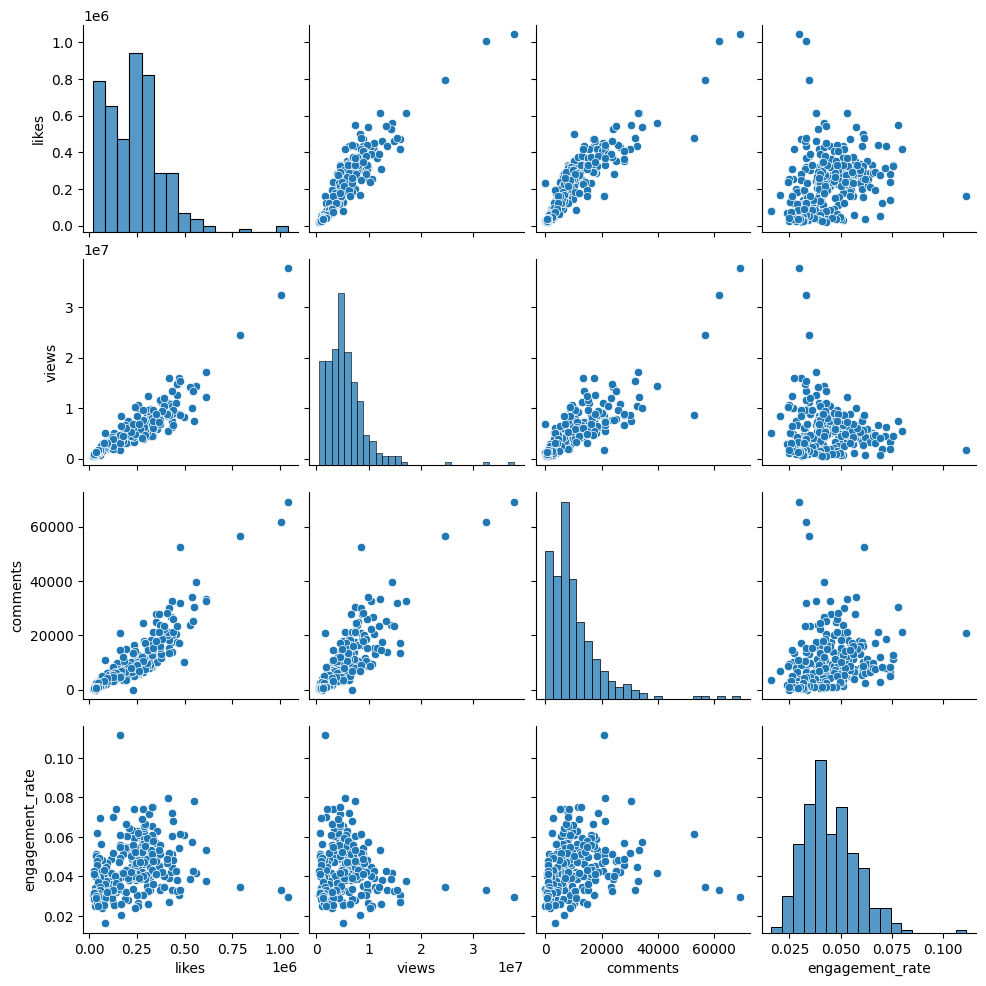

In [13]:
# Scatterplot matrix
sns.pairplot(df[['likes', 'views', 'comments', 'engagement_rate']])


<AxesSubplot: >

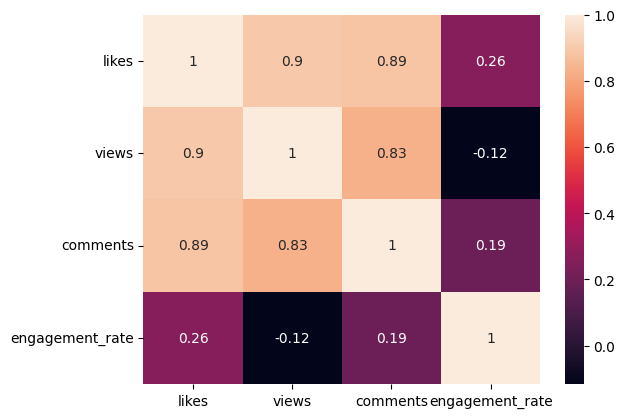

In [14]:
# Correlation matrix
corr_matrix = df[['likes', 'views', 'comments', 'engagement_rate']].corr()
sns.heatmap(corr_matrix, annot=True)

In [15]:
corr_matrix

,likes,views,comments,engagement_rate
likes,1.000000,0.898455,0.885394,0.260355
views,0.898455,1.000000,0.832981,-0.116825
comments,0.885394,0.832981,1.000000,0.191197
engagement_rate,0.260355,-0.116825,0.191197,1.000000


<AxesSubplot: xlabel='publish_date'>

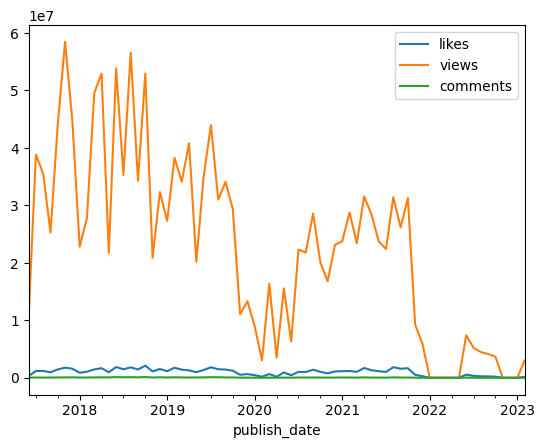

In [16]:
# Time series analysis
df.set_index('publish_date').resample('M')[['likes', 'views', 'comments']].sum().plot()

<AxesSubplot: xlabel='day_of_week'>

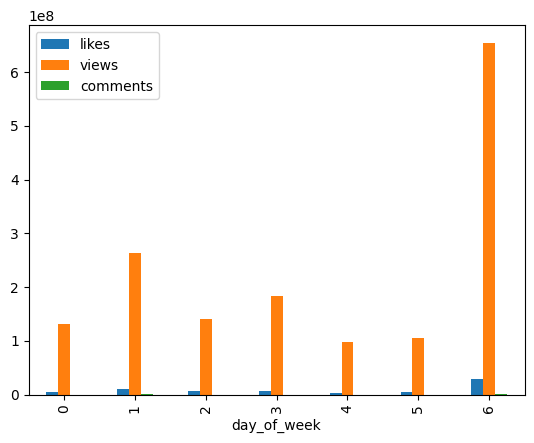

In [17]:
# Time series analysis by day of week
df.groupby('day_of_week')[['likes', 'views', 'comments']].sum().plot(kind='bar')

<AxesSubplot: xlabel='hour'>

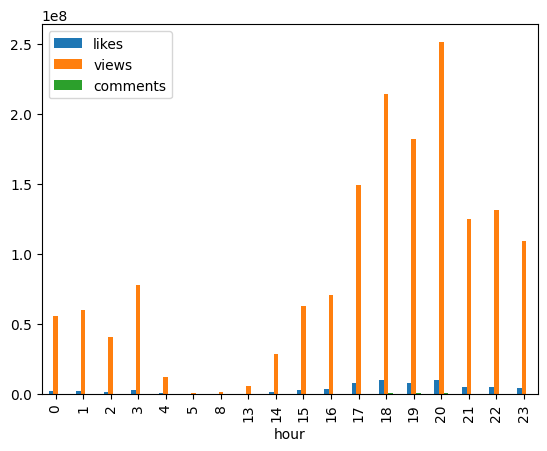

In [18]:
# Time series analysis by hour
df.groupby('hour')[['likes', 'views', 'comments']].sum().plot(kind='bar')

In [19]:
# Most popular videos
print(df[df['views'] == df['views'].max()]['title'])

147    ROADTRIP TO VEGAS FT DOLAN TWINS & JAMES CHARLES
Name: title, dtype: object
